# PCA : House prices 

## We load the libs

In [1]:
import pandas as pd
import sklearn 
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#vérification - librairie numpy
import numpy as np
#classe pour l'ACP
from sklearn.decomposition import PCA
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## We load ours data

In [2]:
filename = 'kaggle-house-prices-train.csv'
data = pd.read_csv(filename, index_col=0)

filename = 'data_quali_num.csv'
X = pd.read_csv('datasets/x_test_formatted.csv', index_col=0)
y = pd.read_csv('datasets/y_train.csv', index_col=0)

In [3]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## We select numeric columns

In [4]:
data_num = data.select_dtypes(exclude=['object'])
print(data_num)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1             60         65.0     8450            7            5       2003   
2             20         80.0     9600            6            8       1976   
3             60         68.0    11250            7            5       2001   
4             70         60.0     9550            7            5       1915   
5             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1456          60         62.0     7917            6            5       1999   
1457          20         85.0    13175            6            6       1978   
1458          70         66.0     9042            7            9       1941   
1459          20         68.0     9717            5            6       1950   
1460          20         75.0     9937            5 

## We convert all columns in float64

In [5]:
data_float = data_num.astype('float64')
data_ok = data_float.dropna()

## We get the shape of ours data
* we keep the number of observations in the variable n
* we keep the number of features in the variable p

In [6]:
data_ok.shape

(1121, 37)

In [7]:
n = data_ok.shape[0]

p = data_ok.shape[1]

## We standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

* instanciation
* transformation - centering-reduction

In [8]:
sc = StandardScaler()

data_cr = sc.fit_transform(data_ok)

## We calculate the mean

In [9]:
np.mean(data_cr,axis=0)


array([-3.84269878e-17, -2.34523472e-16,  3.16923611e-18,  2.66215833e-16,
       -1.42615625e-16, -1.81597229e-15, -1.78744917e-15, -6.33847222e-18,
        1.26769444e-17, -1.58461805e-18,  1.04980946e-16,  1.29938680e-16,
       -1.30730990e-16,  2.69385069e-17,  3.80308333e-17,  1.93323403e-16,
        3.01077430e-17, -2.21846528e-17, -2.18677292e-16, -6.02154861e-17,
        9.82463194e-17, -3.58123680e-16, -1.44200243e-16, -2.85231250e-17,
        1.48161788e-16, -1.45784861e-16, -2.06000347e-17, -6.33847222e-18,
       -5.66500955e-17,  1.70346441e-17, -6.33847222e-18, -2.06000347e-17,
       -1.26769444e-17, -1.90154167e-17, -1.36277153e-16,  3.64937538e-14,
        8.87386111e-17])

## We compute the standard deviation

In [10]:
np.std(data_cr,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## We initialyse the model

In [11]:
acp = PCA(svd_solver='full')

## We print the settings

In [12]:
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


## We calculate the coordinates
* number of computed components : 6

In [13]:
coord = acp.fit_transform(data_cr)

print(acp.n_components_) # 6

37


In [14]:
pprint(coord[1])

array([-2.77399000e-01, -9.70153182e-01,  1.23028786e+00,  3.08981879e-02,
       -1.42243466e+00, -1.72118213e+00, -2.27853090e+00,  3.02908374e+00,
        7.13560340e-01,  1.04674375e+00,  2.02036788e-02,  1.30659351e+00,
       -7.06968071e-01, -1.24700433e+00, -7.42670086e-01,  3.41009480e-01,
        1.22592725e-01, -1.50520353e-01,  6.17006671e-01, -1.01176550e+00,
       -7.35225479e-01, -9.47162625e-04, -7.12217860e-01, -2.48450443e-01,
       -3.35189704e-02, -1.29203165e-01,  4.34639293e-01, -8.42683934e-01,
       -1.07631951e+00,  1.49589611e-01, -3.40717869e-01, -5.90896198e-02,
       -5.02837204e-01,  1.55176833e-01, -1.40398493e-02, -3.76199809e-15,
        1.47490075e-15])


## Explained variance

In [15]:
print(acp.explained_variance_)

[8.22659115e+00 3.16131610e+00 2.70846475e+00 2.04461260e+00
 1.53325397e+00 1.24068837e+00 1.21581805e+00 1.14127343e+00
 1.11914151e+00 1.10087796e+00 1.07487166e+00 1.03170018e+00
 9.81516025e-01 9.25228966e-01 8.95603702e-01 8.53934853e-01
 7.92636734e-01 7.64714340e-01 7.50293507e-01 6.87710495e-01
 6.49834185e-01 6.05359210e-01 5.30090167e-01 4.72679282e-01
 3.97008013e-01 3.84338857e-01 3.22526656e-01 2.72129547e-01
 2.53630961e-01 2.05925228e-01 1.76452761e-01 1.51356598e-01
 1.40857073e-01 1.18514535e-01 1.02084285e-01 1.62240904e-30
 4.42866073e-32]


## Corrected value

In [16]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[8.21925253e+00 3.15849601e+00 2.70604864e+00 2.04278868e+00
 1.53188621e+00 1.23958160e+00 1.21473346e+00 1.14025535e+00
 1.11814317e+00 1.09989591e+00 1.07391281e+00 1.03077984e+00
 9.80640453e-01 9.24403606e-01 8.94804770e-01 8.53173091e-01
 7.91929654e-01 7.64032168e-01 7.49624199e-01 6.87097015e-01
 6.49254494e-01 6.04819193e-01 5.29617294e-01 4.72257623e-01
 3.96653858e-01 3.83996004e-01 3.22238943e-01 2.71886791e-01
 2.53404707e-01 2.05741530e-01 1.76295355e-01 1.51221578e-01
 1.40731420e-01 1.18408812e-01 1.01993220e-01 1.62096175e-30
 4.42471009e-32]


## proportion of variance explained

In [17]:
print(acp.explained_variance_ratio_)

[2.22141960e-01 8.53647571e-02 7.31364497e-02 5.52105049e-02
 4.14023301e-02 3.35022055e-02 3.28306341e-02 3.08177122e-02
 3.02200856e-02 2.97269165e-02 2.90246704e-02 2.78589146e-02
 2.65037960e-02 2.49838812e-02 2.41839127e-02 2.30587322e-02
 2.14035042e-02 2.06495181e-02 2.02601135e-02 1.85701896e-02
 1.75474188e-02 1.63464647e-02 1.43139809e-02 1.27637195e-02
 1.07203745e-02 1.03782704e-02 8.70916063e-03 7.34829165e-03
 6.84877586e-03 5.56058189e-03 4.76473931e-03 4.08706969e-03
 3.80355188e-03 3.20023817e-03 2.75657351e-03 4.38097770e-32
 1.19586759e-33]


## we showing scree plot

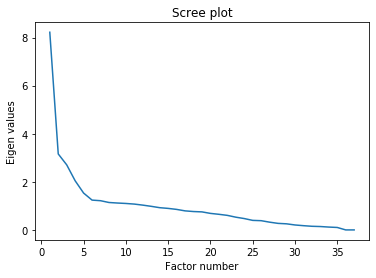

In [18]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


## We showing cumulative variance explained plot

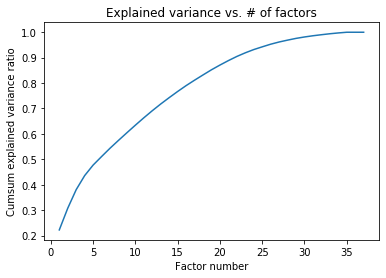

In [19]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


## Thresholds for testing broken sticks

In [20]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


## broken sticks test

In [21]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


      Val.Propre    Seuils
0   8.219253e+00  4.201586
1   3.158496e+00  3.201586
2   2.706049e+00  2.701586
3   2.042789e+00  2.368253
4   1.531886e+00  2.118253
5   1.239582e+00  1.918253
6   1.214733e+00  1.751586
7   1.140255e+00  1.608729
8   1.118143e+00  1.483729
9   1.099896e+00  1.372618
10  1.073913e+00  1.272618
11  1.030780e+00  1.181709
12  9.806405e-01  1.098376
13  9.244036e-01  1.021452
14  8.948048e-01  0.950024
15  8.531731e-01  0.883357
16  7.919297e-01  0.820857
17  7.640322e-01  0.762034
18  7.496242e-01  0.706478
19  6.870970e-01  0.653847
20  6.492545e-01  0.603847
21  6.048192e-01  0.556228
22  5.296173e-01  0.510773
23  4.722576e-01  0.467295
24  3.966539e-01  0.425628
25  3.839960e-01  0.385628
26  3.222389e-01  0.347167
27  2.718868e-01  0.310129
28  2.534047e-01  0.274415
29  2.057415e-01  0.239932
30  1.762954e-01  0.206599
31  1.512216e-01  0.174341
32  1.407314e-01  0.143091
33  1.184088e-01  0.112788
34  1.019932e-01  0.083376
35  1.620962e-30  0.054805
3

## We display the dimensions two by two

In [22]:
coord_df = pd.DataFrame(coord)
coord_ok = coord_df.T
coord_ok

,0,1,2,3,4,5,6,7,8,9,...,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120
0,1.301026e+00,-2.773990e-01,1.545216e+00,-6.113214e-01,4.351215e+00,-1.059789e+00,3.357907e+00,-1.246104e+00,-3.516653e+00,-2.644616e+00,...,2.914175e+00,-3.230444e+00,3.287110e+00,-1.684716e+00,4.289774e-01,5.397465e-01,2.174633e+00,2.539265e-01,-3.053723e+00,-1.148215e+00
1,4.921530e-01,-9.701532e-01,3.808113e-01,1.133556e+00,1.432781e+00,-1.742618e+00,-2.395974e+00,2.761496e+00,-1.090419e-02,-1.753243e+00,...,4.941949e-01,1.134268e+00,-1.144411e+00,-1.859390e+00,-2.163018e+00,1.283416e+00,-1.553558e+00,3.763615e+00,-2.050913e+00,-1.280198e+00
2,-1.265727e+00,1.230288e+00,-1.118510e+00,7.382059e-01,-3.377180e-01,-2.531593e-01,6.162459e-01,1.049030e+00,1.469225e+00,1.174120e+00,...,6.675049e-02,-3.441971e-02,-1.594445e+00,-2.375659e+00,-1.486865e+00,-2.004717e+00,2.273547e+00,3.036150e+00,2.125893e+00,1.765287e+00
3,-2.169522e+00,3.089819e-02,-1.575902e+00,-6.999929e-03,-1.315950e+00,-1.613442e+00,-5.581466e-01,1.631268e+00,-1.899377e+00,-5.282519e-01,...,-1.991415e+00,-2.950394e-01,2.891357e+00,-2.473056e+00,4.936553e-01,2.532082e-01,2.278135e-01,1.204058e-01,-1.008993e+00,-1.842251e+00
4,4.899799e-01,-1.422435e+00,-1.172191e-01,1.079530e+00,2.989044e-01,-1.125249e+00,3.123044e-01,3.089616e+00,3.832350e+00,9.518999e-01,...,2.844855e-01,-1.376887e+00,-1.183275e-01,1.368575e+00,-6.840050e-02,-5.764574e-01,1.523560e-01,-4.664962e+00,-7.516372e-01,-5.930983e-01
5,-6.089950e-01,-1.721182e+00,-6.778035e-02,-4.564360e-01,-5.078225e-01,6.098217e-01,-9.355576e-02,7.677756e-01,2.141616e+00,-5.361441e-01,...,3.234001e-01,-9.088945e-01,9.896087e-03,1.185925e+00,6.703284e-01,9.990967e-02,-1.163071e+00,6.047228e+00,-2.356007e+00,-2.176753e+00
6,1.376046e+00,-2.278531e+00,-1.314718e-01,1.142280e+00,-9.506800e-01,-5.256731e-01,-8.733655e-01,2.653222e-01,-3.397147e-02,8.473367e-01,...,-1.631946e+00,-4.297052e-02,1.065503e+00,-1.786211e-01,2.986665e-01,-2.858826e-01,1.348822e+00,3.476071e+00,2.646879e+00,-1.511339e-01
7,-5.936212e-01,3.029084e+00,-9.153951e-01,-1.500592e+00,-5.228506e-01,8.279232e-01,3.868844e-01,9.808096e-01,1.791050e+00,-6.073859e-01,...,-1.071084e+00,1.503485e-02,3.353737e-01,-2.768697e-01,-1.014276e-01,-1.000277e+00,1.830302e+00,6.032424e+00,7.717350e-01,6.365688e-01
8,-2.117165e-01,7.135603e-01,-5.400454e-01,2.605003e+00,-1.063790e+00,-1.594569e+00,1.202235e-01,1.876165e+00,1.113134e+00,-1.753383e-01,...,-2.702104e-01,-7.244947e-02,3.615801e-01,8.229341e-01,-7.830775e-01,-3.194848e-01,-7.140045e-03,-2.021945e+00,-1.697640e+00,-1.397443e+00
9,-1.820588e-01,1.046744e+00,-4.048596e-02,3.011553e-01,2.842101e-01,8.635263e-01,2.519613e-01,-9.669162e-01,-1.586017e+00,-5.083354e-01,...,-3.258380e-01,-9.502260e-02,-4.454386e-01,8.909471e-01,5.469581e-01,2.540040e-01,-1.110829e+00,7.507976e-01,1.455657e+00,6.594136e-01


In [23]:
marker =  [".",",","o","v","^","<",">",".",",","o","v","^","<",">",".",",","o","v","^","<",">",".",",","o","v","^"]
neighborhood = pd.unique(data["Neighborhood"]).tolist()
neighborhood_all = [data.loc[Neighborhood_id, "Neighborhood"] for Neighborhood_id in data_ok.index]
 
markers = {}
for i in range(25):
    markers[neighborhood[i]] = marker[i]
    
len(neighborhood_all) 

1121

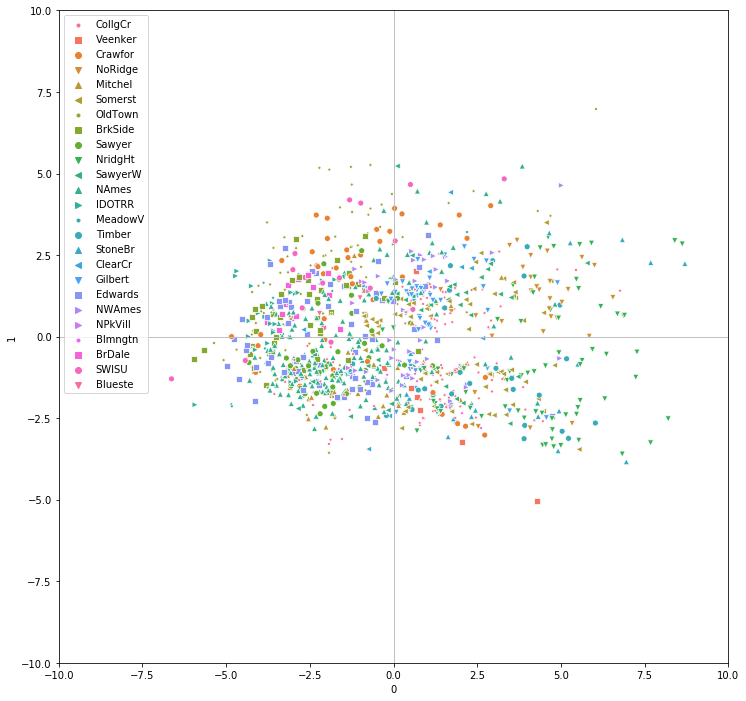

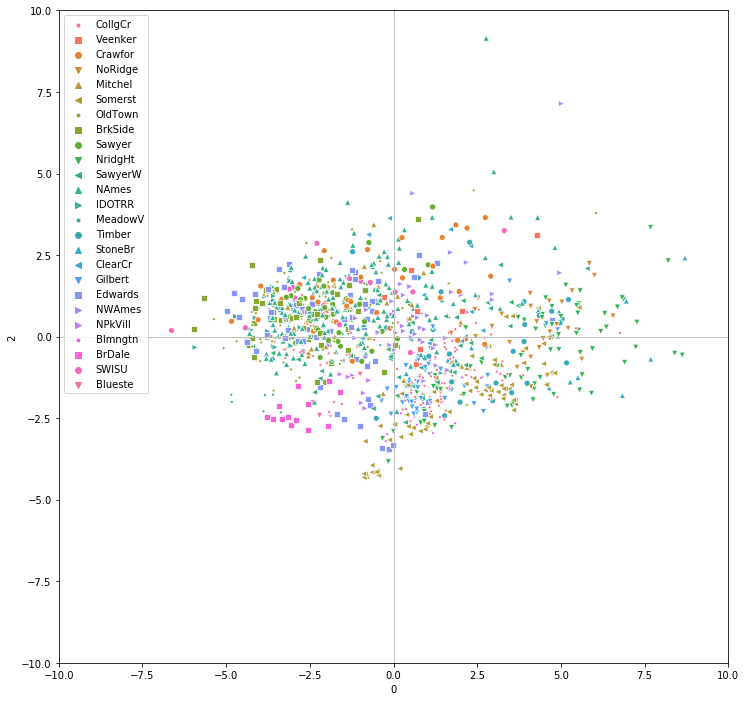

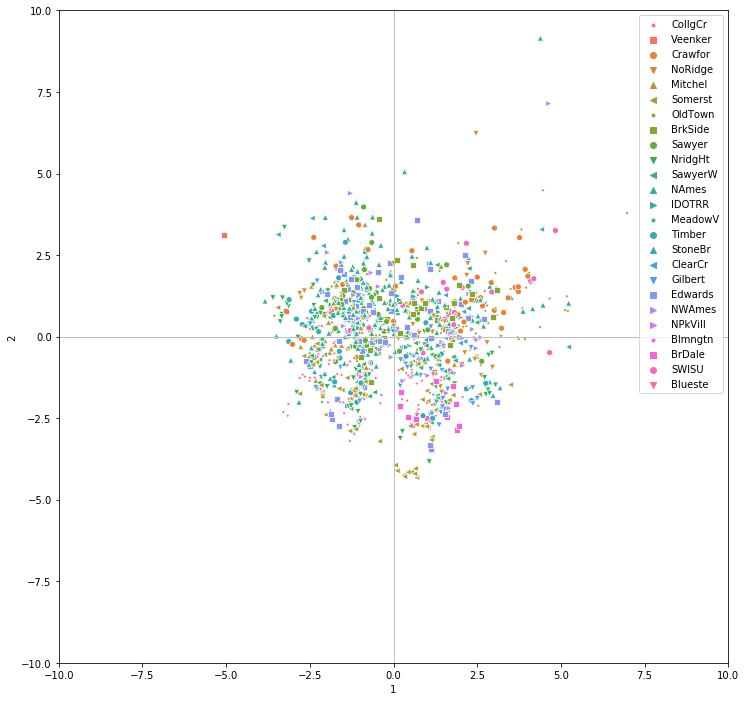

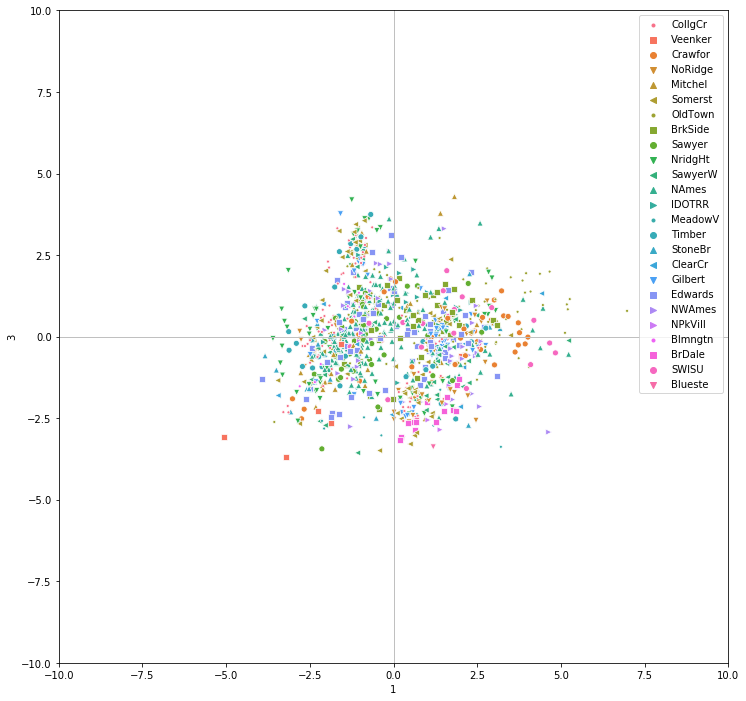

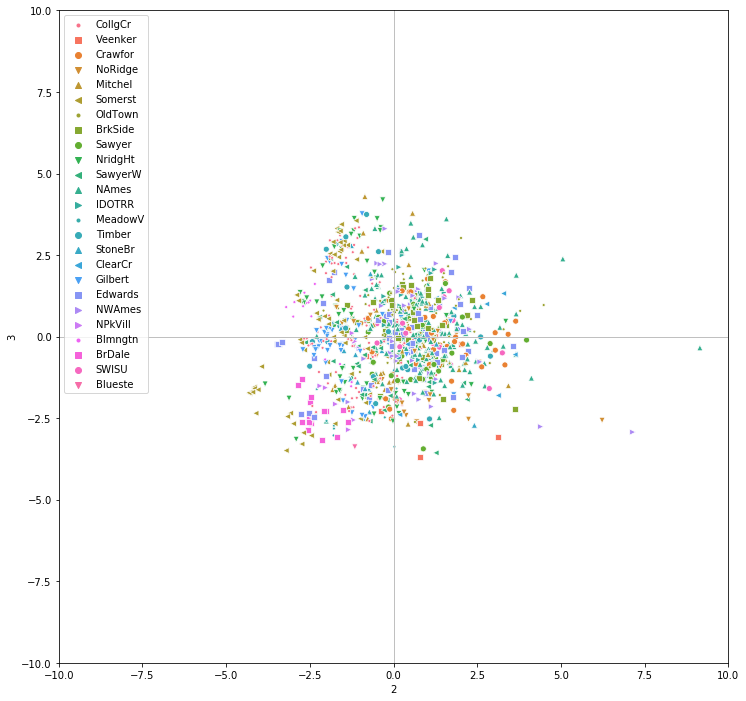

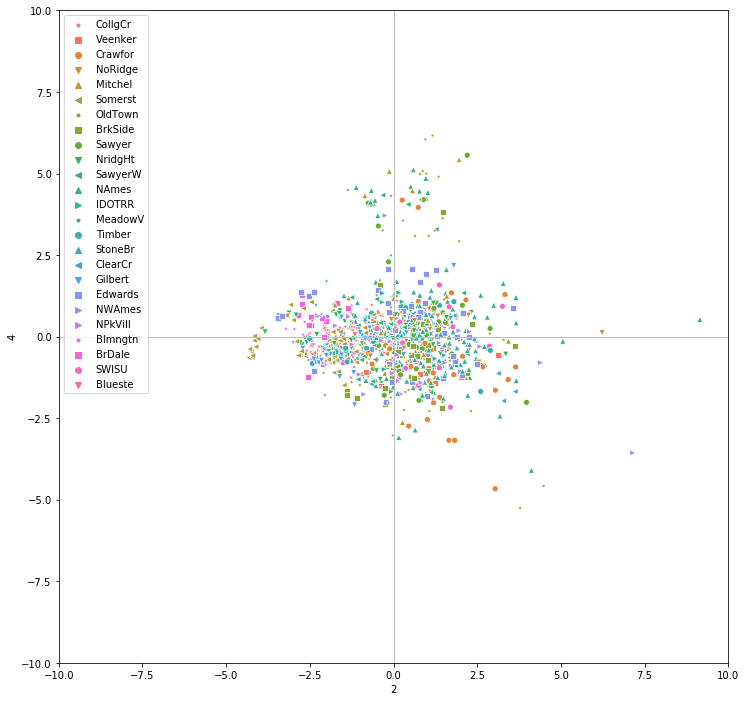

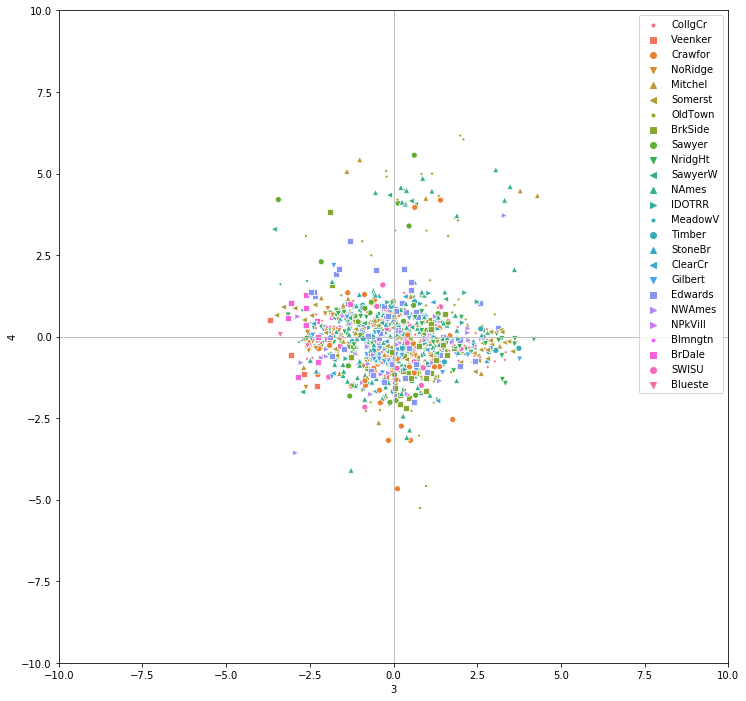

In [24]:
a1=[0,0,1,1,2,2,3]
a2=[1,2,2,3,3,4,4]

# markers = pd.unique(data_quali["Neighborhood"]).tolist()
for a in range(7): 
    #positionnement des individus dans le premier plan
    fig, axes = plt.subplots(figsize=(12,12))
    axes.set_xlim(-10,10) #même limites en abscisse
    axes.set_ylim(-10,10) #et en ordonnée
    #placement des étiquettes des observations
    
    sns.scatterplot(coord_ok.iloc[a1[a]],coord_ok.iloc[a2[a]],  data=coord_ok, style=neighborhood_all,  hue=neighborhood_all,  markers=markers)
    
    #ajouter les axes
    plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)
    #affichage
    plt.show()

## contribution of individuals in total inertia

In [25]:
di = np.sum(data_cr**2,axis=1)
print(pd.DataFrame({'ID':data_ok.index,'d_i':di}))


        ID         d_i
0        1   16.177812
1        2   32.966635
2        3   11.800229
3        4   37.115812
4        5   31.379569
...    ...         ...
1116  1456   10.381025
1117  1457   29.060770
1118  1458  264.604716
1119  1459   68.397695
1120  1460   45.500341

[1121 rows x 2 columns]


## Quality of representation of individuals - COS2

In [26]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data_ok.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]}))

        id    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5
0        1  0.104629  0.014972  0.099028  0.290943  0.014840
1        2  0.002334  0.028550  0.045913  0.000029  0.061375
2        3  0.202343  0.012289  0.106020  0.210459  0.001164
3        4  0.010069  0.034620  0.014682  0.000001  0.031399
4        5  0.603357  0.065420  0.003635  0.055186  0.002847
...    ...       ...       ...       ...       ...       ...
1116  1456  0.028063  0.158670  0.387138  0.006176  0.032011
1117  1457  0.162729  0.083052  0.177869  0.001786  0.000799
1118  1458  0.000244  0.053532  0.034838  0.000055  0.082243
1119  1459  0.136338  0.061497  0.066076  0.014885  0.008260
1120  1460  0.028976  0.036020  0.068488  0.074590  0.007731

[1121 rows x 6 columns]


## Online sum of cos2 = 1

In [27]:
print(np.sum(cos2,axis=1))


[1. 1. 1. ... 1. 1. 1.]


## Contributions to the axes

In [28]:
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':data_ok.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3],'CTR_5':ctr[:,4],'CTR_6':ctr[:,5]}))

        id     CTR_1     CTR_2     CTR_3         CTR_4     CTR_5     CTR_6
0        1  0.000184  0.000068  0.000528  2.055413e-03  0.000140  0.000267
1        2  0.000008  0.000266  0.000499  4.169049e-07  0.001178  0.002132
2        3  0.000259  0.000041  0.000412  1.084499e-03  0.000008  0.000003
3        4  0.000041  0.000363  0.000180  2.139726e-08  0.000679  0.000150
4        5  0.002055  0.000580  0.000038  7.562227e-04  0.000052  0.000186
...    ...       ...       ...       ...           ...       ...       ...
1116  1456  0.000032  0.000465  0.001325  2.799797e-05  0.000194  0.000007
1117  1457  0.000513  0.000682  0.001704  2.266365e-05  0.000014  0.000973
1118  1458  0.000007  0.004001  0.003039  6.330904e-06  0.012673  0.026317
1119  1459  0.001012  0.001188  0.001490  4.445775e-04  0.000329  0.003995
1120  1460  0.000143  0.000463  0.001027  1.482069e-03  0.000205  0.003410

[1121 rows x 7 columns]


In [29]:
np.sum(ctr,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## The components_ field of the PCA object

In [30]:
print(acp.components_)

[[-1.90826644e-02  1.55750374e-01  1.15338836e-01 ...  2.32061197e-02
  -7.14421507e-03  3.08485568e-01]
 [ 1.77733368e-01 -5.99191515e-07 -1.10747821e-02 ...  2.84386890e-02
  -3.34563277e-02 -1.43596405e-02]
 [-2.10992009e-01  2.88592172e-01  2.86144005e-01 ... -2.21697286e-02
   6.83069284e-03  3.21013144e-02]
 ...
 [ 3.11067485e-02  7.76417386e-02 -1.91840031e-02 ... -4.10854287e-03
  -9.21198217e-03  1.75091645e-01]
 [-1.05908570e-16 -9.50205249e-17  2.41148883e-17 ... -7.34455839e-17
   1.77270908e-16 -2.66268083e-16]
 [ 0.00000000e+00 -3.76394625e-16  1.18455548e-16 ...  2.41983725e-17
   1.84961163e-16  4.82811433e-19]]


## square root of eigenvalues

In [31]:
sqrt_eigval = np.sqrt(eigval)

## correlation of variables with axes
* We print the matrix of variable correlations x factors

In [32]:
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

print(corvar)

[[-5.47085462e-02  3.15870551e-01 -3.47083371e-01 ...  9.93436859e-03
  -1.34839610e-31  0.00000000e+00]
 [ 4.46524468e-01 -1.06489263e-06  4.74736197e-01 ...  2.47959586e-02
  -1.20977278e-31 -7.91745901e-32]
 [ 3.30667664e-01 -1.96822778e-02  4.70708944e-01 ... -6.12667563e-03
   3.07023514e-32  2.49171184e-32]
 ...
 [ 6.65301787e-02  5.05416875e-02 -3.64693628e-02 ... -1.31211975e-03
  -9.35087112e-32  5.09012641e-33]
 [-2.04819208e-02 -5.94591143e-02  1.12365388e-02 ... -2.94197339e-03
   2.25695994e-31  3.89065711e-32]
 [ 8.84404643e-01 -2.55201801e-02  5.28068929e-02 ...  5.59179283e-02
  -3.39004525e-31  1.01559360e-34]]


## We displays for the first six axes

In [33]:
ax = pd.DataFrame({'id':data_ok.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4], 'COR_6':corvar[:,5]})
ax

,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
0,MSSubClass,-0.054709,0.315871,-0.347083,-0.469195,0.309779,0.267391
1,LotFrontage,0.446524,-0.000001,0.474736,0.267469,-0.002178,-0.240244
2,LotArea,0.330668,-0.019682,0.470709,0.075756,-0.016116,-0.189683
3,OverallQual,0.825836,-0.031518,-0.152857,-0.022609,-0.174636,0.027628
4,OverallCond,-0.269778,0.108739,0.256174,-0.051675,-0.489740,-0.046325
5,YearBuilt,0.643817,-0.353467,-0.489190,-0.136598,-0.002494,-0.042904
6,YearRemodAdd,0.577430,-0.198470,-0.394284,-0.093416,-0.291386,-0.060932
7,MasVnrArea,0.539139,-0.007984,0.009822,-0.096590,0.104941,-0.005410
8,BsmtFinSF1,0.391782,-0.446236,0.455009,-0.482213,0.173550,0.033881
9,BsmtFinSF2,-0.047240,-0.121862,0.284926,-0.098283,-0.081719,-0.116681


## We only keeps the features that contributes to more than 0.5 on the axes
* we get the labels
* we get the nuber of values

In [34]:
ax_a = 1
ax_b = 2 
ax_c = 3
my_axes = []
labels = []
nbr_values = []
new_features = []

for a in range(4):
    ax1 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_b] > 0.7) | (ax.iloc[:,ax_b] < -0.5)]
    ax2 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_c] > 0.7) | (ax.iloc[:,ax_c] < -0.5)]
    ax_np1 = ax1.iloc[:,[ax_a,ax_b]]
    ax_np2 = ax2.iloc[:,[ax_a,ax_c]]
    my_axes.append(np.asarray(ax_np1))
    my_axes.append(np.asarray(ax_np2))
    label1 = ax1['id'].values
    label2 = ax2['id'].values
    labels.append(label1)
    labels.append(label2)
    new_features.append(label1)
    new_features.append(label2)
    ax1_s = ax1.shape
    ax2_s = ax2.shape
    nbr_values.append(ax1_s[0])
    nbr_values.append(ax2_s[0])
    ax_a += 1
    ax_b += 1 
    ax_c += 1
    
print(my_axes)
print(labels)
print(nbr_values)


[array([[ 0.82583603, -0.03151791],
       [ 0.64381727, -0.35346719],
       [ 0.57743026, -0.19846996],
       [ 0.53913851, -0.00798428],
       [ 0.70946992, -0.38915561],
       [ 0.70451792, -0.29512711],
       [ 0.32910223,  0.81505778],
       [ 0.79420963,  0.47902585],
       [ 0.69735946,  0.23731604],
       [ 0.64495417,  0.58671384],
       [ 0.64031731, -0.28131067],
       [ 0.76940741, -0.06460007],
       [ 0.75470983, -0.1425158 ],
       [ 0.88440464, -0.02552018]]), array([[ 0.82583603, -0.15285701],
       [ 0.64381727, -0.4891903 ],
       [ 0.57743026, -0.39428392],
       [ 0.53913851,  0.00982226],
       [ 0.70946992,  0.27404389],
       [ 0.70451792,  0.36260507],
       [ 0.79420963,  0.21641812],
       [ 0.69735946, -0.25292806],
       [ 0.64495417,  0.17630071],
       [ 0.64031731, -0.5290391 ],
       [ 0.76940741, -0.18800619],
       [ 0.75470983, -0.06721147],
       [ 0.88440464,  0.05280689]]), array([[ 0.81505778, -0.07409892],
       [ 0.6530

## We display the correlation circles for the first six dimentions

In [ ]:
i = 0
for i in range(7):
    #cercle des corrélations
    fig, axes = plt.subplots(figsize=(20,20))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    #affichage des étiquettes (noms des variables)
    for j in range(nbr_values[i]):
        plt.annotate(labels[i][j],(my_axes[i][j][0],my_axes[i][j][1]))
        plt.quiver(my_axes[i][j][0],my_axes[i][j][1], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

    #ajouter les axes
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

    #ajouter un cercle
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes.add_artist(cercle)
    #affichage
    plt.show()

In [ ]:
list(labels[0])

## Cosinus square variables

In [ ]:
cos2var = corvar**2
print(pd.DataFrame({'id':data_ok.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

## contributions
* We show for the first five axes

In [ ]:
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

print(pd.DataFrame({'id':data_ok.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))